In [148]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# **File Loading**

In [149]:
folder = os.path.expanduser('~/Desktop/Machine Learning/data_ML_Project')
file_path = os.path.join(folder, 'CompFirmCharac.csv')  # No extension

if os.path.exists(file_path):
    data = pd.read_csv(file_path)
else:
    print("File still not found!")

/var/folders/rj/fv3npnl910bd6btffd6d3ph80000gn/T/ipykernel_32903/458106690.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [150]:
data.head()

,gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,...,xoptepsqpy,xoptepsy,xoptqpy,xopty,xrdy,xsgay,exchg,cik,costat,fic
0,1000,1966-03-31,1966,1.0,12,INDL,C,D,STD,AE.2,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,I,USA
1,1000,1966-06-30,1966,2.0,12,INDL,C,D,STD,AE.2,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,I,USA
2,1000,1966-09-30,1966,3.0,12,INDL,C,D,STD,AE.2,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,I,USA
3,1000,1966-12-31,1966,4.0,12,INDL,C,D,STD,AE.2,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,I,USA
4,1000,1967-03-31,1967,1.0,12,INDL,C,D,STD,AE.2,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,I,USA


In [151]:
# Find columns with string (object or string) dtype
print("String columns:", data.select_dtypes(include=["object", "string"]).columns.tolist())

String columns: ['datadate', 'indfmt', 'consol', 'popsrc', 'datafmt', 'tic', 'cusip', 'conm', 'curcdq', 'datacqtr', 'datafqtr', 'costat', 'fic']


Delete the columns :

- indfmt : "string" describes the general industry presentation for the associated data record. Ex : Industrial company or financial serves company ----> not useful for ML
- consol : "string" refers to data consolidation, which means combining data from different sources into a single, unified repository. not useful for ML
- popsrc : "string" specify the source or origin of the data. not useful for ML
- datafmt : "string" used to describe data values and program variables. not useful for ML
- tic : "string" refers to a specific type of data or category within the reporting framework. Ex : AE.2 ------> not useful for ML
- conm : "string" official compagny name. not useful for ML
- datacqtr/datafqtr : "string" refers to a variable indicating the calendar year and quarter of a financial period. not useful for ML.
- costat : "string" indicate whether a company is currently active, inactive. not useful for ML.
- fic : "string" represents the country code where the company is incorporated or registred. not useful for ML.
- curcdq : "string" currency in which a particular financial data item is reported. Since through time the CAD/USD was relatively close to 1 we will consider USD as our main currency, thus we will drop this column

Keep the columns :

- datadate : Date at which the information was collected


In [152]:
# Identify constant columns (excluding NaNs)
constant_columns = [col for col in data.columns 
                    if data[col].nunique(dropna=True) == 1]

print("Constant columns:")
print(constant_columns)
print(f"Total constant columns: {len(constant_columns)}")

Constant columns:
['indfmt', 'consol', 'popsrc', 'datafmt', 'ustdncy']
Total constant columns: 5


In [153]:
# List of columns to drop
columns_to_drop = [ 
    "fyearq", "indfmt", "consol", "popsrc", "datafmt", "tic", "conm",
    "datacqtr", "datafqtr", "costat", "fic", "curcdq", "fqtr","fyr","ustdncy","exchg","cik"
]

data.drop(columns=columns_to_drop, inplace=True)

"fqtr","fyr" are columns designated for fiscal year and fiscal quarter -------> not usefull for ML
"exchg"  possible stock exchanges -------> not useful for ML.
cik : "scalar" is the SEC's unique identifier for corporations and individuals who have filed disclosures with
the SEC. CIKs are not available for Exchange Traded Funds. -------> not useful for ML

In [154]:
# Identify columns where more than 70% of values are NaN
nan_majority_columns = [column for column in data.columns if data[column].isna().mean() > 0.7]

print("Columns where the majority of values were converted to NaN:", nan_majority_columns)

data.drop(columns=nan_majority_columns, inplace=True)

Columns where the majority of values were converted to NaN: ['afudccy', 'afudciy', 'amcy', 'aqay', 'aqdy', 'aqepsy', 'aqpy', 'arcedy', 'arceepsy', 'arcey', 'cdvcy', 'cimiiy', 'ciy', 'depcy', 'derhedgly', 'dprety', 'dteay', 'dtedy', 'dteepsy', 'dtepy', 'esuby', 'fcay', 'ffoy', 'finrevy', 'finxinty', 'finxopry', 'fopty', 'fsrcoy', 'fsrcty', 'fuseoy', 'fusety', 'gdwlamy', 'gdwliay', 'gdwlidy', 'gdwliepsy', 'gdwlipy', 'glay', 'glceay', 'glcedy', 'glceepsy', 'glcepy', 'gldy', 'glepsy', 'glivy', 'glpy', 'hedgegly', 'ibmiiy', 'itccy', 'ncoy', 'niity', 'nimy', 'nrtxtdy', 'nrtxtepsy', 'nrtxty', 'optdry', 'optfvgry', 'optlifey', 'optrfry', 'optvoly', 'pdvcy', 'plly', 'pncdy', 'pncepsy', 'pnciapy', 'pnciay', 'pncidpy', 'pncidy', 'pnciepspy', 'pnciepsy', 'pncippy', 'pncipy', 'pncpdy', 'pncpepsy', 'pncpy', 'pncwiapy', 'pncwiay', 'pncwidpy', 'pncwidy', 'pncwiepsy', 'pncwiepy', 'pncwippy', 'pncwipy', 'pncy', 'prcay', 'prcdy', 'prcepsy', 'prcpdy', 'prcpepsy', 'prcpy', 'prstkccy', 'prstkpcy', 'rcay', '

In [ ]:
#Winsorize (Cap extremes at 10th and 90th percentiles)
for col in data.select_dtypes(include=[np.number]).columns:
    lower = data[col].quantile(0.1)
    upper = data[col].quantile(0.9)
    data[col] = np.clip(data[col], lower, upper)


# Exclude identifier columns
exclude_columns = ['gvkey', 'datadate','cusip']
columns_to_normalize = [col for col in data.columns if col not in exclude_columns]

# Apply StandardScaler
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

print("All numeric columns normalized (mean = 0, std = 1).")

All numeric columns normalized (mean = 0, std = 1).


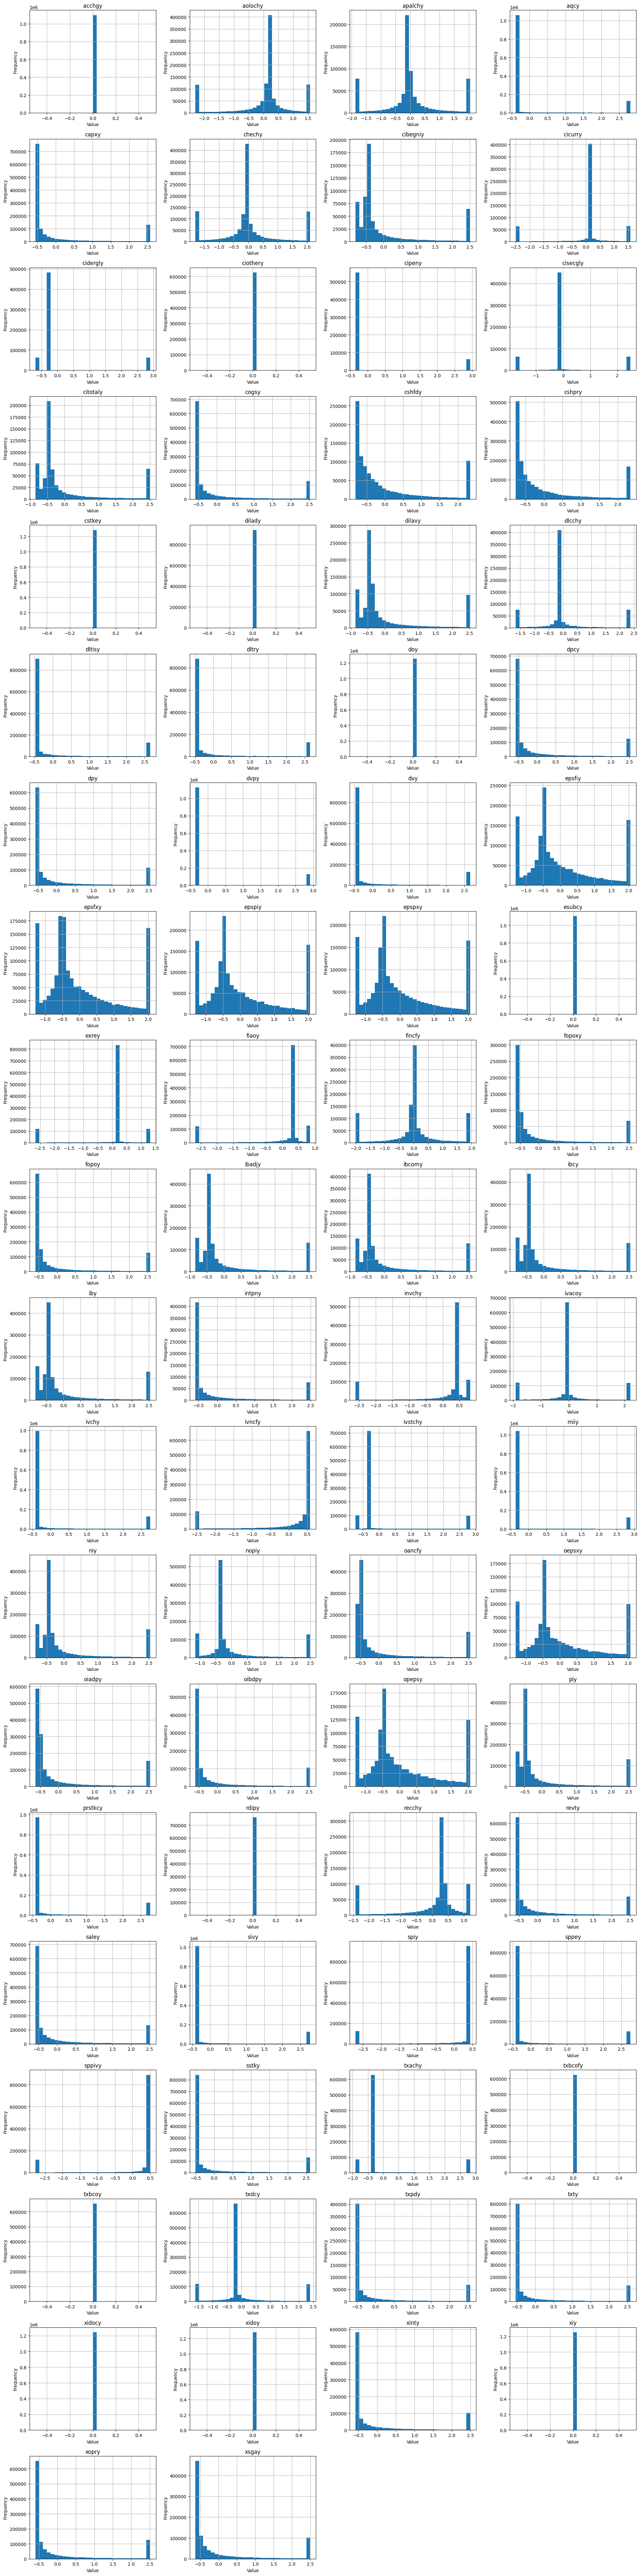

In [156]:
# Define number of subplots
n = len(columns_to_normalize)
cols = 4  # Number of plots per row
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot each distribution
for i, col in enumerate(columns_to_normalize):
    data[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [157]:
# Identify constant columns (excluding NaNs)
constant_columns = [col for col in data.columns 
                    if data[col].nunique(dropna=True) == 1]

print("Constant columns:")
print(constant_columns)
print(f"Total constant columns: {len(constant_columns)}")

Constant columns:
['acchgy', 'ciothery', 'cstkey', 'dilady', 'doy', 'esubcy', 'rdipy', 'txbcofy', 'txbcoy', 'xidocy', 'xidoy', 'xiy']
Total constant columns: 12


From the graph we drop the constant normalized columns as well 

In [158]:
columns_to_drop = [ 
    "acchgy", "ciothery", "cstkey", "dilady", "doy", "esubcy", "rdipy", "txbcofy", "txbcoy", "xidocy", "xidoy", "xiy",
]

data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Exclude identifier columns
exclude_columns = ['gvkey', 'datadate','cusip']
columns_to_normalize = [col for col in data.columns if col not in exclude_columns]

# Calculate skewness for all numeric columns
skewness = data[columns_to_normalize].skew(skipna=True)

for col in columns_to_normalize:
    if data[col].isna().any():
        col_nonan = data[col].dropna()

        if abs(skewness[col]) > 2:
            # Log-normal imputation (handles 0s with log1p)
            log_values = np.log1p(col_nonan)
            mean_log = log_values.mean()
            std_log = log_values.std()

            num_missing = data[col].isna().sum()
            log_randoms = np.random.normal(loc=mean_log, scale=std_log, size=num_missing)
            random_values = np.expm1(log_randoms)  # Inverse of log1p

            data.loc[data[col].isna(), col] = random_values
        else:
            # Normal imputation
            mean_val = col_nonan.mean()
            std_val = col_nonan.std()
            if pd.notna(mean_val) and pd.notna(std_val) and std_val > 0:
                num_missing = data[col].isna().sum()
                random_values = np.random.normal(loc=mean_val, scale=std_val, size=num_missing)
                data.loc[data[col].isna(), col] = random_values


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


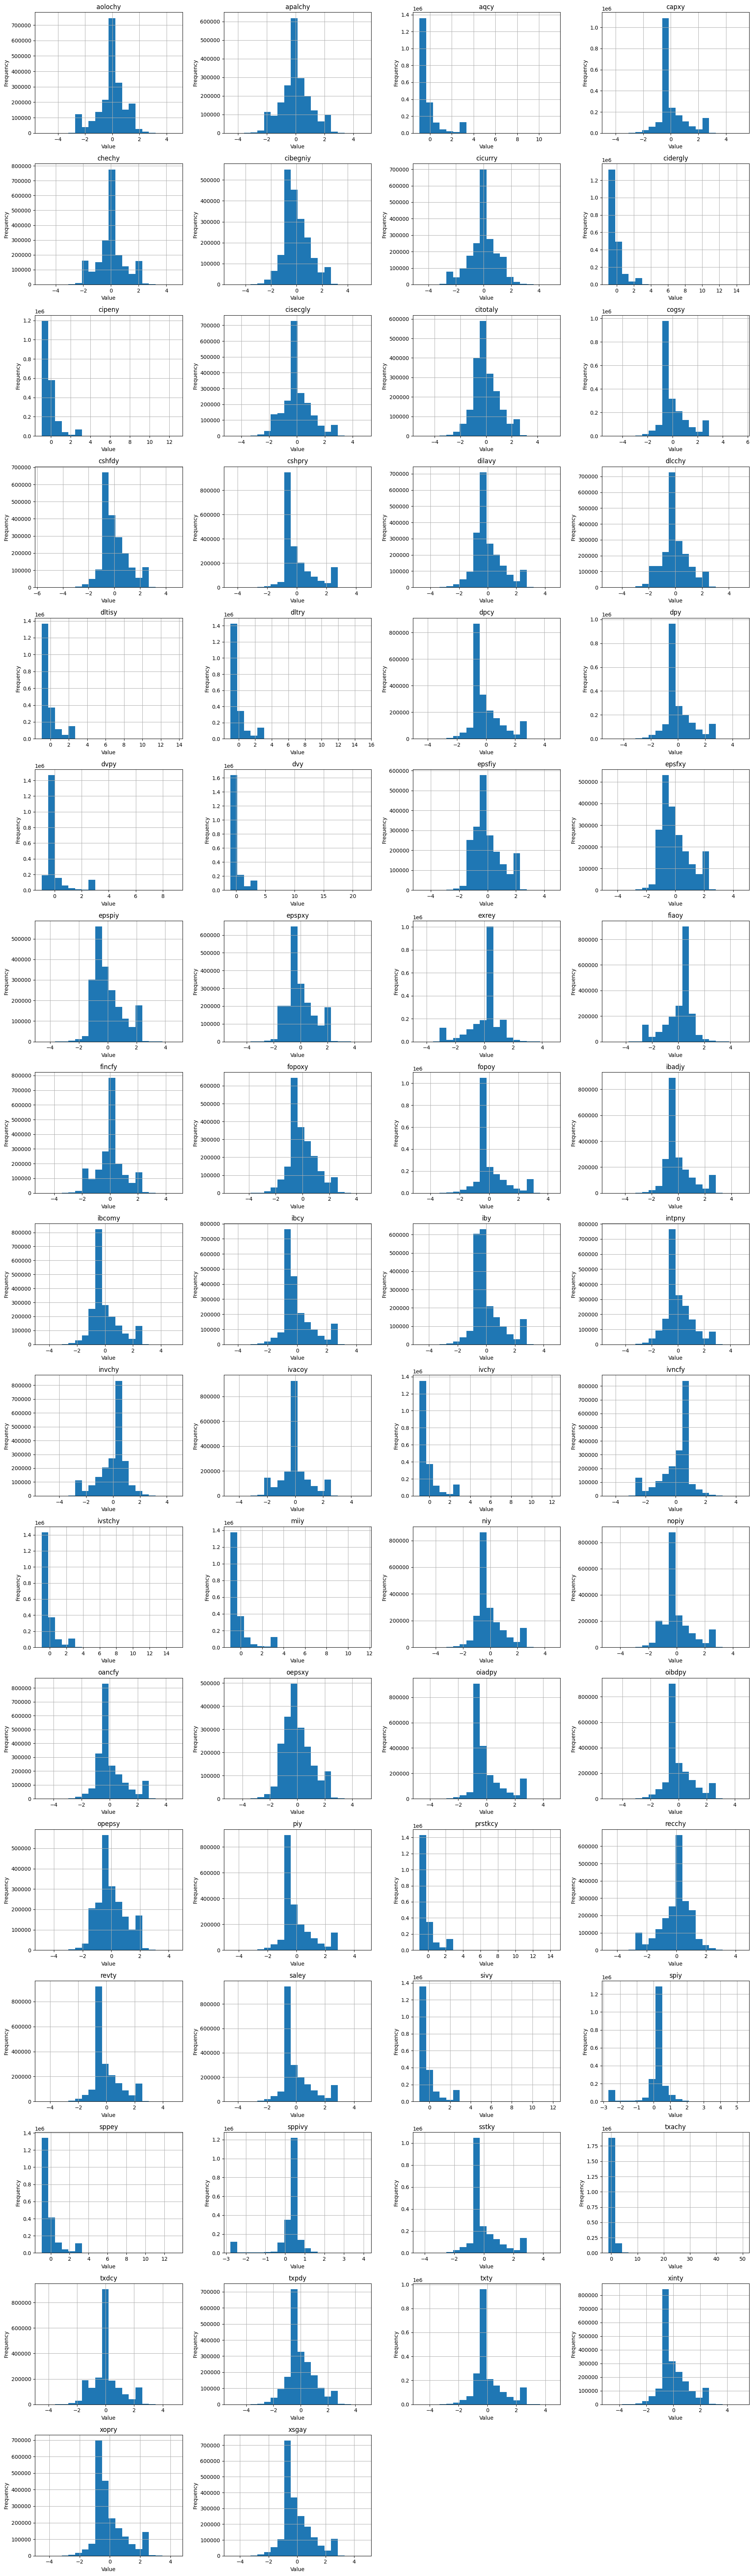

In [161]:
# Define number of subplots
n = len(columns_to_normalize)
cols = 4  # Number of plots per row
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot each distribution
for i, col in enumerate(columns_to_normalize):
    data[col].hist(bins=20, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# **Save processed data**

In [162]:
data.to_csv("normalized_filtered_CompFirmCharac.csv", index=False)
